<a href="https://colab.research.google.com/github/matsunori39/deep-learning-from-scratch-4/blob/main/deep_learning_from_scratch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/oreilly-japan/deep-learning-from-scratch-4

In [1]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch-4

Cloning into 'deep-learning-from-scratch-4'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 405 (delta 10), reused 7 (delta 7), pack-reused 391
Receiving objects: 100% (405/405), 866.33 KiB | 2.58 MiB/s, done.
Resolving deltas: 100% (234/234), done.


# Chapter 1 Bandit problem

## 1.3 Bandit Algorithm

### 1.3.2 Implementation to find the average

In [2]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):
  reward = np.random.rand()
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [3]:
Q = 0

for n in range(1, 11):
  reward = np.random.rand()
  Q = Q + (reward - Q) / n
  # Q += (reward - Q) / n
  print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


## 1.4 Bandit Algorithm Implementation

### 1.4.1 Slot machine implementation

In [4]:
import numpy as np

class Bandit:
  def __init__(self, arms=10):
      self.rates = np.random.rand(arms)
  
  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [5]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


### 1.4.2 Agent Implementation


In [6]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
  # Play the 0th slot machine
  reward = bandit.play(0)
  Q += (reward - Q) / n
  print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


In [7]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(0, 10)
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [8]:
class Agent:
  def __init__(self, epsilon, action_size=10):
      self.epsilon = epsilon
      self.Qs = np.zeros(action_size)
      self.ns = np.zeros(action_size)
  
  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
  
  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

### 1.4.3 Let's run

892


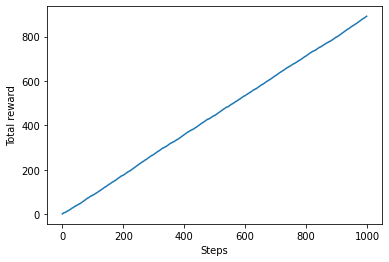

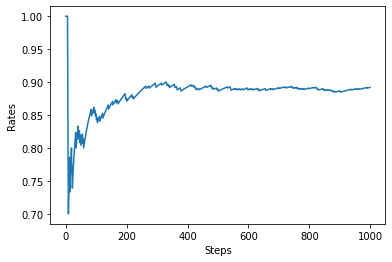

In [9]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  # (1) Choose an action
  action = agent.get_action()
  # (2) Get rewarded for actually playing
  reward = bandit.play(action)
  # (3) Learning from Behavior and Rewards
  agent.update(action, reward)
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# Drawing Graphs(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# Drawing Graphs(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

### 1.4.4 Average nature of the algorithm

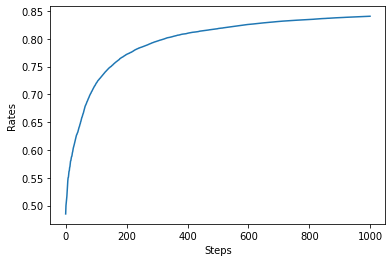

In [10]:
from math import e
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (step+1))
  
  # (1) Record the results of the reward
  all_rates[run] = rates

# (2) Find the average value at each step
avg_rates = np.average(all_rates, axis=0)

# (3) Drawing Graphs
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 nonstationary problem

In [11]:
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms)

    def play(self, arm):
      rate = self.rates[arm]
      # Adding Noise
      self.rates += 0.1 * np.random.randn(self,arms)
      if rate > np.random.rand():
        return 1
      else:
        return 0

### 1.5.2 Solving non-stationary problems

In [12]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions=10):
      self.epsilon = epsilon
      self.Qs = np.zeros(actions)
      self.alpha = alpha
  
  def update(self, action, reward):
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha
  
  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

# Chapter 4 Dynamic Programming

## 4.2 To the larger issue

### 4.2.1 Implementation of GridWorld class

In [13]:
%pwd

'/content'

In [14]:
%ls

deep-learning-from-scratch-4/  sample_data/


In [15]:
%cd /content/deep-learning-from-scratch-4

/content/deep-learning-from-scratch-4


In [16]:
import numpy as np
import common.gridworld_render as render_helper

class GridWorld:
  def __init__(self):
    self.action_space = [0, 1, 2, 3]
    self.action_meaning = {
        0: "UP",
        1: "DOWN",
        2: "LEFT",
        3: "RIGHT",
    }

    self.reward_map = np.array(
        [[0, 0, 0, 1.0],
         [0, None, 0, -1.0],
         [0, 0, 0, 0]]
    )
    self.goal_state = (0, 3)
    self.wall_state = (1, 1)
    self.start_state = (2, 0)
    self.agent_state = self.start_state

  @property
  def height(self):
    return len(self.reward_map)

  @property
  def width(self):
    return len(self.reward_map[0])

  @property
  def shape(self):
    return self.reward_map.shape
  
  def actions(self):
    return self.action_space  # [0, 1, 2, 3]
  
  def states(self):
    for h in range(self.height):
      for w in range(self.width):
        yield (h, w)
  
  def next_state(self, state, action):
    # (1) Calculate the destination location
    action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    move = action_move_map[action]
    next_state = (state[0] + move[0], state[1] + move[1])
    ny, nx = next_state

    # (2) Is the destination outside the GridWorld frame or is the destination a wall?
    if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
      next_state = state
    elif next_state == self.wall_state:
      next_state = state
    
    return next_state

  def reward(self, state, action, next_state):
    return self.reward_map[next_state]
  
  def render_v(self, v=None, policy=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_v(v, policy, print_value)

In [17]:
env = GridWorld()

print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


In [18]:
for action in env.actions():
  print(action)

print('===')

for state in env.states():
  print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


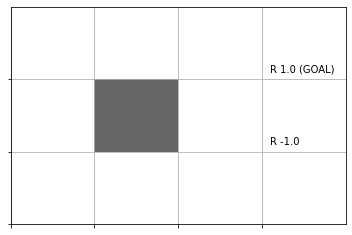

In [19]:
env = GridWorld()
env.render_v()

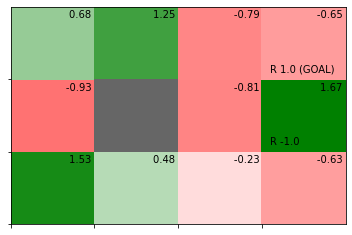

In [21]:
env = GridWorld()
V = {}
for state in env.states():
  # Dummy state value function
  V[state] = np.random.randn()
env.render_v(V)

### 4.2.2 How to use defaultdict

In [22]:
env = GridWorld()
V = {}

# Initialize dictionary elements
for state in env.states():
  V[state] = 0

state = (1, 2)
# Output value function for state (1, 2)
print(V[state])

0


In [23]:
from collections import defaultdict

env = GridWorld()
V = defaultdict(lambda: 0)

state = (1, 2)
print(V[state])

0


In [24]:
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})

state = (0, 1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


### 4.2.3 Implementaion of Iterative Measure Evaluation

In [25]:
def eval_onestep(pi, V, env, gamma=0.9):
  # (1) Access to each state
  for state in env.states():
    # (2) The goal value function is always θ
    if state == env.goal_state:
      V[state] = 0
      continue
    
    # 'probs' stands for probabilities
    action_probs = pi[state]
    new_V = 0

    # (3) Access to each action
    for action, action_prob in action_probs.items():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      # (4) New value function
      new_V += action_prob * (r + gamma * V[next_state])
    V[state] = new_V
  return V

In [26]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
  while True:
    # Vale function before update
    old_V = V.copy()
    V = eval_onestep(pi, V, env, gamma)

    # Find the maximum value of the updated quantity
    delta = 0
    for state in V.keys():
      t = abs(V[state] - old_V[state])
      if delta < t:
        delta = t
    
    # Comparison with threshold
    if delta < threshold:
      break
  return V

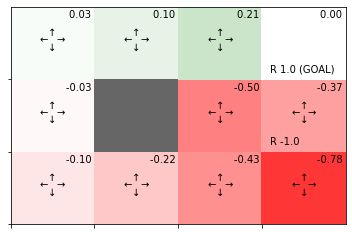

In [27]:
env = GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

## 4.4 Policy Iteration Implementation

### 4.4.1 Improvement of measures

In [30]:
def argmax(d):
  max_value = max(d.values())
  max_key = 0
  for key, value in d.items():
    if value == max_value:
      max_key = key
  return max_key

In [31]:
action_values = {0: 0.1, 1: -0.3, 2: 9.9, 3: -1.3}

max_action = argmax(action_values)
print(max_action)

2


In [32]:
def greedy_policy(V, env, gamma):
  pi = {}

  for state in env.states():
    action_values = {}

    for action in env.actions():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state]
      action_values[action] = value

      max_action = argmax(action_values)
      action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
      action_probs[max_action] = 1.0
      pi[state] = action_probs
  return pi

In [35]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
  pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
  V = defaultdict(lambda: 0)

  while True:
    # (1) evaluation
    V = policy_eval(pi, V, env, gamma, threshold)
    # (2) improvement
    new_pi = greedy_policy(V, env, gamma)

    if is_render:
      env.render_v(V, pi)
    
    # (3) Update Check
    if new_pi == pi:
      break
    pi = new_pi

  return pi

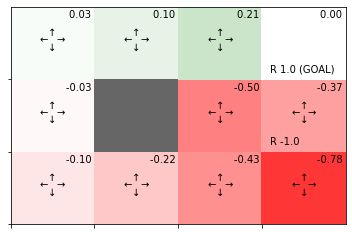

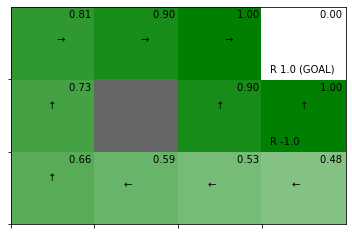

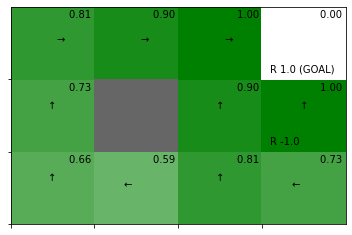

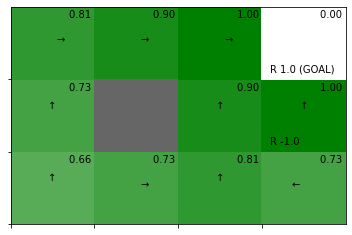

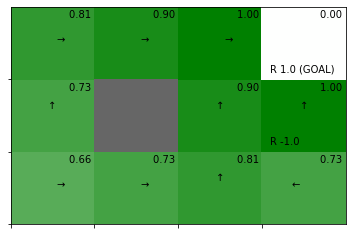

In [36]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)

In [73]:
def value_iter_onestep(V, env, gamma):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_values = []
        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values.append(value)

        V[state] = max(action_values)
    return V

In [78]:
def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)

        old_V = V.copy()
        V = value_iter_onestep(V, env, gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        if delta < threshold:
            break
    return V

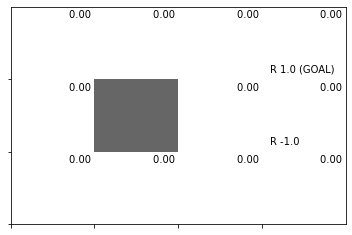

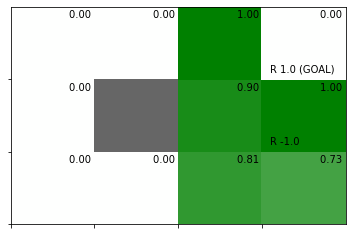

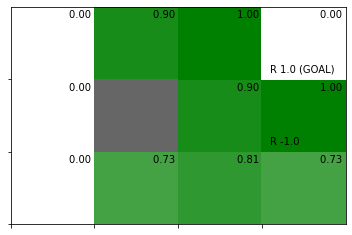

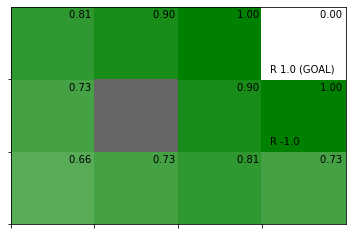

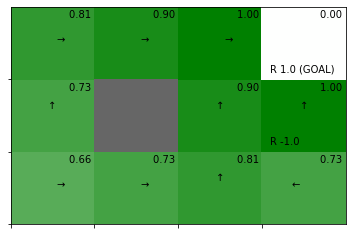

In [79]:
V = defaultdict(lambda: 0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)

pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)